In [1]:
from fastai.vision.all import *
import pandas as pd
import cam
import util

In [2]:
dls, labels = util.chexpert_data_loader(reparse=True)

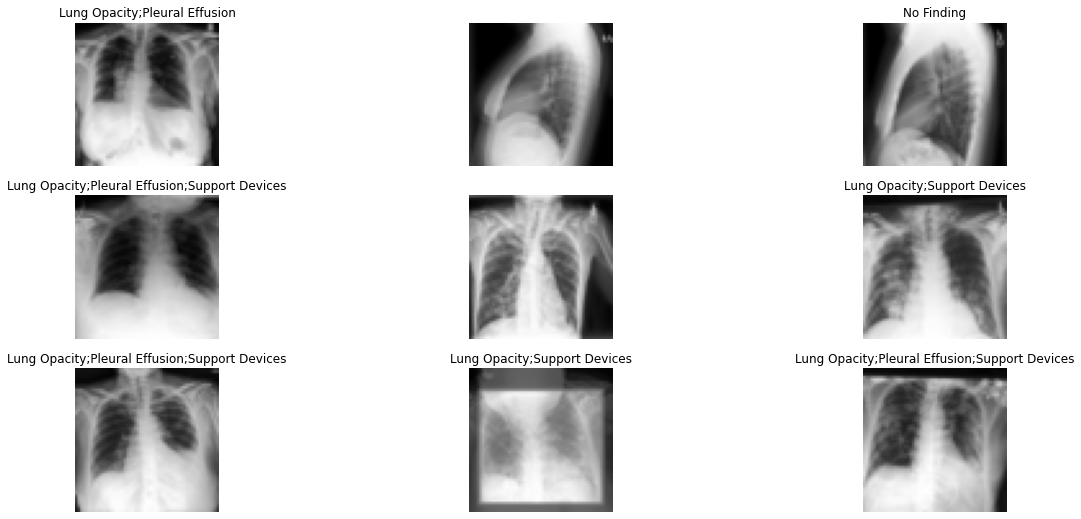

In [3]:
dls.show_batch(max_n=9, figsize=(20,9))

In [4]:
chexpert_learner = util.ChexpertLearner(dls, densenet121, n_out=len(labels),
                                        loss_func=BCEWithLogitsLossFlat(),
                                        metrics=[RocAucMulti(average=None),
                                                 RocAucMulti(average='weighted')])

In [5]:
chexpert_learner.learn_model(use_saved=True , epochs=2, freeze_epochs=1)

/opt/conda/lib/python3.8/site-packages/fastai/learner.py:56: UserWarning: Saved filed doesn't contain an optimizer state.
  elif with_opt: warn("Saved filed doesn't contain an optimizer state.")


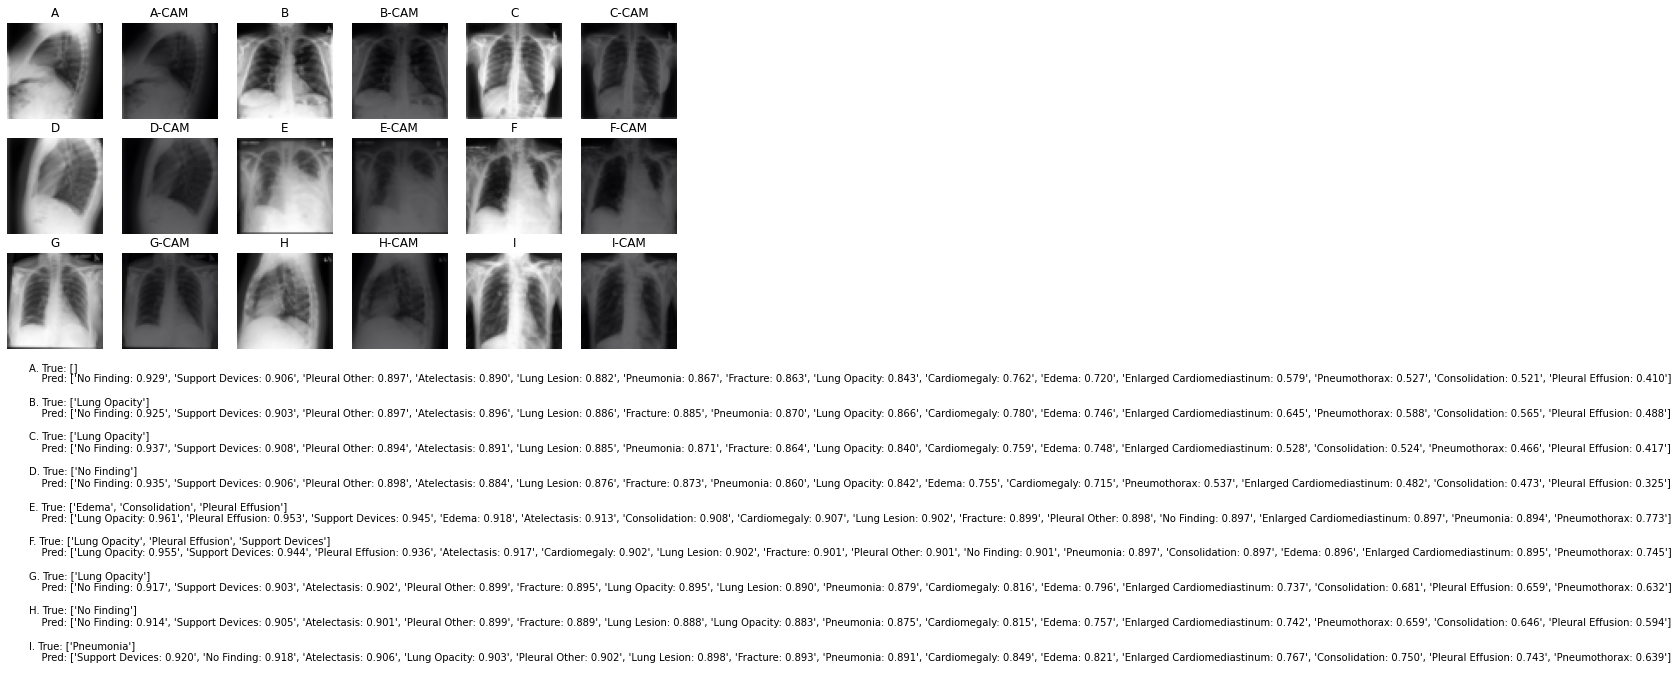

In [6]:
cam.plot_cam(chexpert_learner.learn)